In [1]:
import re
import pandas as pd
import datetime
import mysql.connector
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [2]:
conexao = mysql.connector.connect(host='localhost',user='root',password='',database='producao')
cursor = conexao.cursor()

Tempo médio concessão-depósito: [1] 2007 = 10.30
Tempo médio concessão-data_nacional: 2007 = 9.23
Tempo médio concessão-pedexame: 2007 = 2.57
Tempo médio concessão-depósito: [7] 2008 = 11.85
Tempo médio concessão-data_nacional: 2008 = 5.46
Tempo médio concessão-pedexame: 2008 = 1.86
Tempo médio concessão-depósito: [1] 2009 = 13.92
Tempo médio concessão-data_nacional: 2009 = 12.41
Tempo médio concessão-pedexame: 2009 = 4.62
Tempo médio concessão-depósito: [4] 2010 = 11.06
Tempo médio concessão-data_nacional: 2010 = 5.38
Tempo médio concessão-pedexame: 2010 = 3.58
Tempo médio concessão-depósito: [4] 2011 = 11.62
Tempo médio concessão-data_nacional: 2011 = 6.13
Tempo médio concessão-pedexame: 2011 = 3.87
Tempo médio concessão-depósito: [19] 2012 = 11.87
Tempo médio concessão-data_nacional: 2012 = 7.83
Tempo médio concessão-pedexame: 2012 = 6.32
Tempo médio concessão-depósito: [75] 2013 = 10.77
Tempo médio concessão-data_nacional: 2013 = 8.68
Tempo médio concessão-pedexame: 2013 = 7.27
Tem

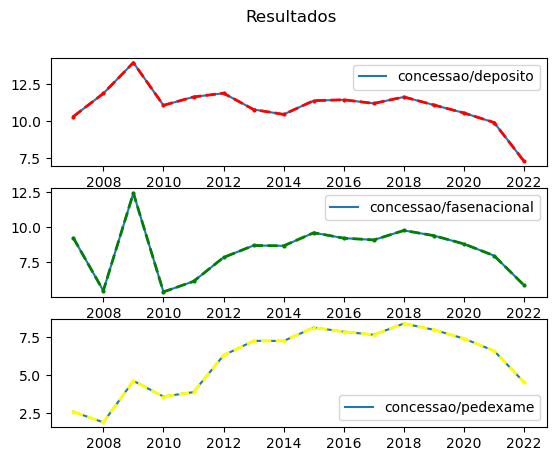

In [3]:
def numOfDays(date1, date2):
    return (date2-date1).days

y = []
x = []
z = []
w = []
#confere média de tempo de registro
for ano in range(2002, 2023, 1):
    soma1 = 0
    soma2 = 0
    soma3 = 0
    total = 0
    comando = f'select * from arqpatentes where year(concessao)={ano} and data_deposito is not null and data_nacional is not null and pedexame is not null'
    cursor.execute(comando)
    resultado = cursor.fetchall()
    for row in resultado:
        #print("numero= "+str(row[0]))
        #print("data deposito= "+str(row[1]))
        if row[1] is not None:
            d=datetime.datetime.strptime(str(row[1]), "%Y-%m-%d")
            date1 = datetime.date(d.year, d.month, d.day)
        #print("data nacional= "+str(row[2]))
        if row[2] is not None:
            d=datetime.datetime.strptime(str(row[2]), "%Y-%m-%d")
            date2 = datetime.date(d.year, d.month, d.day)       
        #print("data concessao= "+str(row[4]))
        if row[4] is not None:
            d=datetime.datetime.strptime(str(row[4]), "%Y-%m-%d")
            date4 = datetime.date(d.year, d.month, d.day)
        #print("data pedexame= "+str(row[3]))
        if row[3] is not None:
            d=datetime.datetime.strptime(str(row[3]), "%Y-%m-%d")
            date3 = datetime.date(d.year, d.month, d.day)
        #print(numOfDays(date1, date5)/365, "anos")
        soma1 = soma1 + numOfDays(date1, date4)
        soma2 = soma2 + numOfDays(date2, date4)
        soma3 = soma3 + numOfDays(date3, date4)
        total = total + 1
        #print("\n")
    
    if total>0:
        media1 = soma1/total/365
        y.append(media1)
        media2 = soma2/total/365
        z.append(media2)
        media3 = soma3/total/365
        w.append(media3)
        x.append(ano)
        print(f'Tempo médio concessão-depósito: [{total}] {ano} = {media1:.2f}')
        print(f'Tempo médio concessão-data_nacional: {ano} = {media2:.2f}')
        print(f'Tempo médio concessão-pedexame: {ano} = {media3:.2f}')

fig, aux = plt.subplots(3)
fig.suptitle('Resultados')
aux[0].plot(x,y,label="concessao/deposito")
aux[0].legend()
aux[0].plot(x,y,color='red' , marker='o', markersize=2, linestyle='dashed', linewidth=2)

aux[1].plot(x,z,label="concessao/fasenacional")
aux[1].legend()
aux[1].plot(x,z,color='green' , marker='o', markersize=2, linestyle='dashed', linewidth=2)

aux[2].plot(x,w,label="concessao/pedexame")
aux[2].legend()
aux[2].plot(x,w,color='yellow' , marker='o', markersize=2, linestyle='dashed', linewidth=2)

plt.show()


jan
Total registros: 1837
Tempo médio para concessão-deposito: 7.72
Tempo médio para concessão-pedexame: 4.93 [-2.79]
Tempo médio para concessão-fase nacional: 6.22 [-1.49]

112013019315
fev
Total registros: 2117
Tempo médio para concessão-deposito: 7.64
Tempo médio para concessão-pedexame: 4.76 [-2.88]
Tempo médio para concessão-fase nacional: 6.13 [-1.51]

122021012908
mar
Total registros: 2260
Tempo médio para concessão-deposito: 7.57
Tempo médio para concessão-pedexame: 4.73 [-2.84]
Tempo médio para concessão-fase nacional: 6.07 [-1.50]

102013019767
PI0622295
PI0919000
abr
Total registros: 2053
Tempo médio para concessão-deposito: 7.69
Tempo médio para concessão-pedexame: 4.96 [-2.73]
Tempo médio para concessão-fase nacional: 6.32 [-1.37]

112015026372
112017018859
mai
Total registros: 2855
Tempo médio para concessão-deposito: 7.56
Tempo médio para concessão-pedexame: 4.75 [-2.81]
Tempo médio para concessão-fase nacional: 6.09 [-1.47]

jun
Total registros: 1686
Tempo médio para co

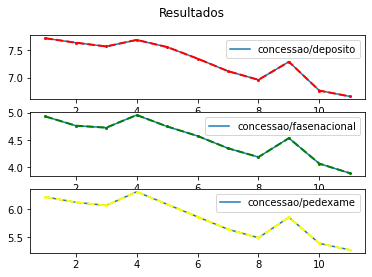

In [10]:
y = []
x = []
z = []
w = []
meses = np.array(['','jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez'])

#confere média de tempo de registro
for mes in range(1, 12, 1):
    ano = 2022
    soma_deposito = 0
    soma_pedexame = 0
    soma_nacional = 0
    total = 0
    comando = f'select * from arquivadosxml where year(data)={ano} and month(data)={mes} and despacho="16.1" and anulado=0'
    cursor.execute(comando)
    resultado = cursor.fetchall()
    for row in resultado:
        numero = str(row[2])
        d=datetime.datetime.strptime(str(row[3]), "%Y-%m-%d")
        d_concessao = datetime.date(d.year, d.month, d.day)
        
        try:
            d_deposito = None
            d_nacional = None
            d_pedexame = None
            comando = f"select * from arqpatentes where numero='{numero}'"
            cursor.execute(comando)
            resultado = cursor.fetchone()
            if resultado is not None:
                d = resultado[1]
                if d is not None:
                    data_deposito = str(d.year) + '-' + str(d.month) + '-' + str(d.day)
                    d_deposito = datetime.date(d.year, d.month, d.day)
                d = resultado[2]
                if d is not None:
                    data_nacional = str(d.year) + '-' + str(d.month) + '-' + str(d.day)
                    d_nacional = datetime.date(d.year, d.month, d.day)
                d = resultado[3]
                if d is not None:
                    pedexame = str(d.year) + '-' + str(d.month) + '-' + str(d.day)
                    d_pedexame = datetime.date(d.year, d.month, d.day)

                #print(data_deposito)
        except (mysql.connector.Error, mysql.connector.Warning) as e:
            print(e)
            print(str(numero))
        
        if d_deposito is not None and d_pedexame is not None and d_nacional is not None:
            soma_deposito = soma_deposito + numOfDays(d_deposito, d_concessao)
            soma_pedexame = soma_pedexame + numOfDays(d_pedexame, d_concessao)
            soma_nacional = soma_nacional + numOfDays(d_nacional, d_concessao)
            total = total + 1
        else:
            print(numero)
    
    media_deposito=0
    media_pedexame=0
    media_nacional=0
    if total>0:
        media_deposito = soma_deposito/total/365
        media_pedexame = soma_pedexame/total/365
        media_nacional = soma_nacional/total/365
    y.append(media_deposito)
    z.append(media_pedexame)
    w.append(media_nacional)
    x.append(mes)
    diferenca1 = media_pedexame - media_deposito
    diferenca2 = media_nacional - media_deposito
    print(meses[mes])
    print(f'Total registros: {total}')
    print(f'Tempo médio para concessão-deposito: {media_deposito:.2f}')
    print(f'Tempo médio para concessão-pedexame: {media_pedexame:.2f} [{diferenca1:.2f}]')
    print(f'Tempo médio para concessão-fase nacional: {media_nacional:.2f} [{diferenca2:.2f}]')
    print()


fig, aux = plt.subplots(3)
fig.suptitle('Resultados')
aux[0].plot(x,y,label="concessao/deposito")
aux[0].legend()
aux[0].plot(x,y,color='red' , marker='o', markersize=2, linestyle='dashed', linewidth=2)

aux[1].plot(x,z,label="concessao/fasenacional")
aux[1].legend()
aux[1].plot(x,z,color='green' , marker='o', markersize=2, linestyle='dashed', linewidth=2)

aux[2].plot(x,w,label="concessao/pedexame")
aux[2].legend()
aux[2].plot(x,w,color='yellow' , marker='o', markersize=2, linestyle='dashed', linewidth=2)

plt.show()
